In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from utils import *

In [2]:
all_epsilons = [1,2,3,4,5,10,50,100,500,1000]

In [3]:
cifar10_results = {
    'mobilenetv2_x0_5': {'accuracy': 93.14, 'latency': 37.05},
    'mobilenetv2_x0_75': {'accuracy': 94.08, 'latency': 37.24},
    'mobilenetv2_x1_0': {'accuracy': 93.94, 'latency': 36.74},
    'mobilenetv2_x1_4': {'accuracy': 94.24, 'latency': 37.28},
    'repvgg_a0': {'accuracy': 94.32, 'latency': 41.06},
    'repvgg_a1': {'accuracy': 95.5, 'latency': 42.77},
    'repvgg_a2': {'accuracy': 95.22, 'latency': 43.98},
    'resnet20': {'accuracy': 92.68, 'latency': 17.45},
    'resnet32': {'accuracy': 93.7, 'latency': 26.64},
    'resnet44': {'accuracy': 93.92, 'latency': 33.15},
    'resnet56': {'accuracy': 94.26, 'latency': 44.26},
    'shufflenetv2_x0_5': {'accuracy': 90.6, 'latency': 44.63},
    'shufflenetv2_x1_0': {'accuracy': 93.74, 'latency': 46.28},
    'shufflenetv2_x1_5': {'accuracy': 93.7, 'latency': 45.31},
    'shufflenetv2_x2_0': {'accuracy': 93.68, 'latency': 47.42},
    'vgg11_bn': {'accuracy': 93.22, 'latency': 11.07},
    'vgg13_bn': {'accuracy': 93.72, 'latency': 12.83},
    'vgg16_bn': {'accuracy': 93.92, 'latency': 15.14},
    'vgg19_bn': {'accuracy': 94.3, 'latency': 18.17},
    'vit_small_patch16_384': {'accuracy': 98.02, 'latency': 35.86},
    'vit_base_patch16_384': {'accuracy': 98.32, 'latency': 36.27},
    'vit_large_patch16_384': {'accuracy': 98.38, 'latency': 67.79}
}

cifar100_results = {
    'mobilenetv2_x0_5': {'accuracy': 71.04, 'latency': 36.91},
    'mobilenetv2_x0_75': {'accuracy': 74.42, 'latency': 37.05},
    'mobilenetv2_x1_0': {'accuracy': 74.44, 'latency': 36.12},
    'mobilenetv2_x1_4': {'accuracy': 76.04, 'latency': 37.0},
    'repvgg_a0': {'accuracy': 76.24, 'latency': 41.82},
    'repvgg_a1': {'accuracy': 76.44, 'latency': 41.98},
    'repvgg_a2': {'accuracy': 77.24, 'latency': 46.43},
    'resnet20': {'accuracy': 68.78, 'latency': 17.06},
    'resnet32': {'accuracy': 69.42, 'latency': 28.64},
    'resnet44': {'accuracy': 71.52, 'latency': 36.63},
    'resnet56': {'accuracy': 72.12, 'latency': 47.22},
    'shufflenetv2_x0_5': {'accuracy': 67.86, 'latency': 46.91},
    'shufflenetv2_x1_0': {'accuracy': 73.1, 'latency': 47.06},
    'shufflenetv2_x1_5': {'accuracy': 74.36, 'latency': 49.13},
    'shufflenetv2_x2_0': {'accuracy': 75.0, 'latency': 49.69},
    'vgg11_bn': {'accuracy': 70.44, 'latency': 10.97},
    'vgg13_bn': {'accuracy': 74.02, 'latency': 12.94},
    'vgg16_bn': {'accuracy': 74.68, 'latency': 16.6},
    'vgg19_bn': {'accuracy': 75.16, 'latency': 20.24},
    'vit_small_patch16_384': {'accuracy': 90.04, 'latency': 36.16},
    'vit_base_patch16_384': {'accuracy': 90.1, 'latency': 39.29},
    'vit_large_patch16_384': {'accuracy': 90.82, 'latency': 73.69}
}

In [6]:
# m_zoo = [[50,10],[60,12],[65,15],[68,18],[73,23],[71,23.5],[75,24],[80,36],[85,43],[84,45],[88,49],[91,56],[95,69],[97,78],[98,86],[98.5,91],[99,96],[99.2,98],[99.3,99],[99.5,100]]
m_zoo_cifar10 = [[spec['accuracy'], spec['latency']] for model, spec in cifar10_results.items()]
m_zoo_cifar100 = [[spec['accuracy'], spec['latency']] for model, spec in cifar100_results.items()]

len(m_zoo_cifar10)

22

In [12]:
my_pareto_front = pareto_front_from_model_zoo(m_zoo_cifar10)
print(len(my_pareto_front))
print(type(my_pareto_front))

7
<class 'numpy.ndarray'>


In [13]:
my_pareto_front

array([[93.22, 11.07],
       [93.72, 12.83],
       [93.92, 15.14],
       [94.3 , 18.17],
       [98.02, 35.86],
       [98.32, 36.27],
       [98.38, 67.79]])

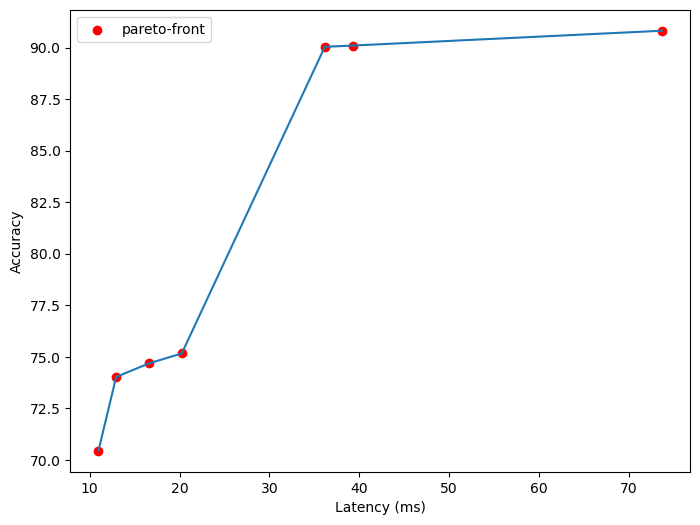

In [10]:
plot_pareto_front(my_pareto_front)

## List of 5000 queries

### What probability function are you using to generate these queries?

In [6]:
random.seed(42)
queries = [(random.randint(50, 100), random.randint(10, 100)) for _ in range(5000)]

In [7]:
print(queries[:10])

[(90, 24), (51, 45), (65, 38), (58, 23), (93, 79), (55, 85), (77, 14), (51, 21), (63, 39), (82, 87)]


In [9]:
dist_utility_l1_paf = []
selected = [] 
for eps in all_epsilons:
    dist_utility_score = dist_utility_l1_score_paf(eps, 1, queries, my_pareto_front)
    dist_utility_l1_paf.append(dist_utility_score)

computing goodput for 1
computing goodput for 2
computing goodput for 3
computing goodput for 4
computing goodput for 5
computing goodput for 10
computing goodput for 50
computing goodput for 100
computing goodput for 500
computing goodput for 1000


In [9]:
dist_utility_l1_paf

[0.891570899999993,
 0.8960442999999958,
 0.901824599999997,
 0.9037510999999974,
 0.9092423999999941,
 0.9260998999999978,
 0.9785499342969658,
 0.9926985186983859,
 0.9996906258540551,
 0.9999258028792903]

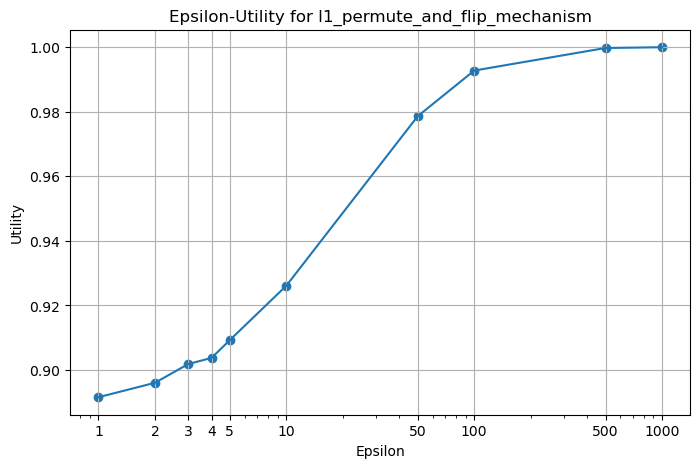

In [10]:
plot_utility(all_epsilons, dist_utility_l1_paf, l1_permute_and_flip_mechanism)

In [11]:
utility_goodput_paf = []
for eps in all_epsilons:
    utility_goodput_paf.append(utility_goodput_score_paf(eps, 1, queries, my_pareto_front))

computing goodput for 1
computing goodput for 2
computing goodput for 3
computing goodput for 4
computing goodput for 5
computing goodput for 10
computing goodput for 50
computing goodput for 100
computing goodput for 500
computing goodput for 1000


In [12]:
utility_goodput_paf

[0.3188, 0.4034, 0.4658, 0.5422, 0.5982, 0.7062, 0.718, 0.718, 0.718, 0.718]

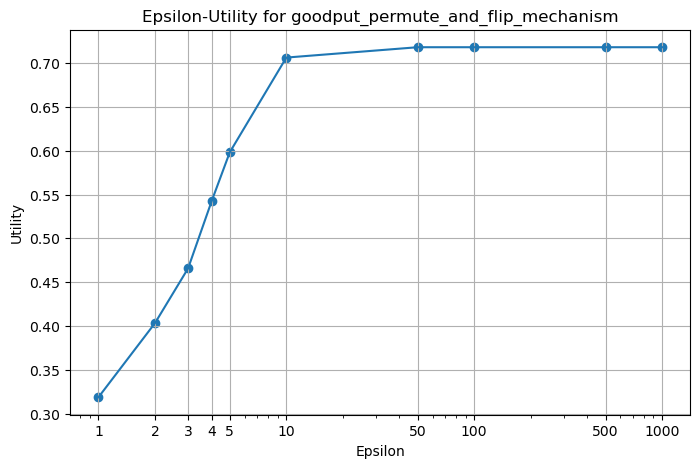

In [13]:
plot_utility(all_epsilons, utility_goodput_paf, goodput_permute_and_flip_mechanism)

In [17]:
# [50,10],[60,12],[65,15],[68,18],[73,23]

q = [50,10]
query_examples = [[60,12],[65,15],[68,18],[73,23]]

In [18]:
for query_ex in query_examples:
    print(l1_score(q[0], q[1], query_ex[0], query_ex[1]))

0.95
0.925
0.9099999999999999
0.885


In [19]:
l1_score(q[0], q[1], 50, 10)

1.0

In [20]:
l1_score(q[0], q[1], 55, 15)

0.975